### This notebook presented the prediction of Total_Primary_Energy_Consumption_Monthly by Seasonal ARIMA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import itertools

## Load data

In [2]:
df1 = pd.read_csv('data/Total_Primary_Energy_Consumption_Monthly.csv',skiprows=4,index_col='Month',parse_dates=True)
df1.columns = ['total-primary-energy-monthly']
df1 = df1.sort_index()
df1.head()

,total-primary-energy-monthly
Month,
1973-01-01,7226.265
1973-02-01,6594.709
1973-03-01,6524.198
1973-04-01,5944.336
1973-05-01,6074.551


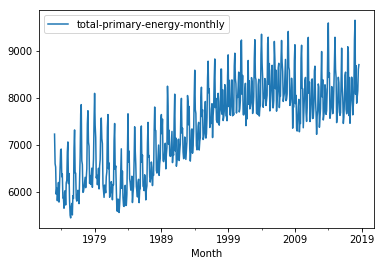

In [3]:
df1.plot()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 1973-01-01 to 2018-08-01
Data columns (total 1 columns):
total-primary-energy-monthly    548 non-null float64
dtypes: float64(1)
memory usage: 8.6 KB


## Split data

In [5]:
train = pd.DataFrame(df1.iloc[:385,0])
test = pd.DataFrame(df1.iloc[385:,0])

## Find optimum parameter for SARIMA

In [6]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [7]:
import statsmodels.api as sm
warnings.filterwarnings("ignore")
v_aic=[]
v_pdq=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            v_pdq.append([param, param_seasonal])
            v_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7903.010235669645
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7403.817065491514
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6618.17445542115
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5195.130207916109
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5031.316484155206
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:4863.625072819386
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:5326.342166283576
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4873.090699885691
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:4679.104157689277
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5189.153242283195
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5150.203964092123
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:4990.379469153488
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5044.033711401071
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5032.291777193184
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:4865.624330472798
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:5025.688879344947
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:4858.360501503625
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:4680.460121248132
ARIMA(0, 0,

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:4520.479084983172
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:4892.794721469423
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:4647.391071781149
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:4418.722500571272
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:4797.813021114796
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:4722.991390701349
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:4683.934209409372
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:4601.6711500879555
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:4557.536765195315
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:4521.813388584989
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:4638.469479679652
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:4494.824367322491
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:4414.2018842988155
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:6090.54721707162
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:5666.814512560514
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:5403.638167268686
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:5416.132093923492
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:5074.442620928983
ARIMA(0, 

ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:5413.538505295007
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:5045.6063048275355
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:4981.064145034465
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:4695.745459557398
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:4533.436586645668
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:5181.462700480697
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:4704.120745980223
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:4425.121174682335
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:5005.762946842086
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:5049.904427504103
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:5041.688011734541
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:4806.470008042824
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:4696.064819142432
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:4533.376969708685
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:4885.355176111685
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:4648.190686053525
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:4426.377952631861
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:4794.644781257194
ARIMA(1, 

ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:4710.131012253448
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:4470.03415069412
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:4832.112807163401
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:4748.89020753976
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:5036.671237603316
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:4629.110181776288
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:4578.566659457467
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:4566.988127007182
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:4667.360220130542
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:4519.941910159891
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:4467.1096394317865
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:5775.792986419685
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:5338.304212616336
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:5168.228840479308
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:4993.655458968299
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:4677.532989411268
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:4566.211466883957
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:5194.870052883449
ARIMA(1, 2,

ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:4992.129240913922
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:4697.86982636578
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:4534.034361712031
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:5189.791943107354
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:4720.886806607302
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:4432.648748905172
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:5012.6270310336295
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:4857.323797852436
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:5091.494386509194
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:4776.533479778018
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:4699.781890865807
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:4533.8589702333775
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:4870.631699648696
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:4707.4604160186445
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:4462.299052296876
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:4770.962900122611
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:5116.261069674013
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:4700.068788659708
ARIMA(2,

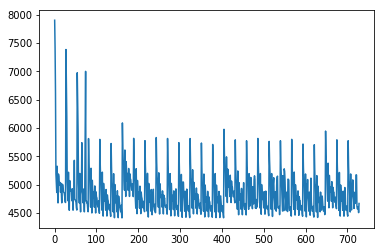

In [8]:
plt.plot(v_aic)

In [9]:
min(v_aic)

4414.2018842988155

In [10]:
np.argmin(v_aic)

161

In [11]:
v_pdq[161]

[(0, 1, 2), (2, 2, 2, 12)]

Parameter for model is ARIMA(0, 1, 2)x(2, 2, 2, 12)12 with AIC:4414.2018842988155

## Build model

In [14]:
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [15]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 2),
                                seasonal_order=(2, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4065      0.049     -8.369      0.000      -0.502      -0.311
ma.L2         -0.2481      0.052     -4.744      0.000      -0.351      -0.146
ar.S.L12       0.0692      0.052      1.331      0.183      -0.033       0.171
ar.S.L24      -0.1107      0.031     -3.575      0.000      -0.171      -0.050
ma.S.L12      -2.0772      0.078    -26.556      0.000      -2.230      -1.924
ma.S.L24       1.0773      0.089     12.142      0.000       0.903       1.251
sigma2      2.152e+04   8.07e-06   2.67e+09      0.000    2.15e+04    2.15e+04


In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:       total-primary-energy-monthly   No. Observations:                  385
Model:             SARIMAX(0, 1, 2)x(2, 2, 2, 12)   Log Likelihood               -2200.101
Date:                            Sun, 23 Dec 2018   AIC                           4414.202
Time:                                    00:20:49   BIC                           4440.859
Sample:                                01-01-1973   HQIC                          4424.832
                                     - 01-01-2005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4065      0.049     -8.369      0.000      -0.502      -0.311
ma.L2         -0.2481      0.052     -4.744      0.000      -0.351      -0.146
ar.S.L12       0.0692      0.052      1.331      0.183      -0.033       0.171
ar.S.L24      -0.1107      0.031     -3.575      0.000      -0.171      -0.050
ma.S.L12      -2.0772      0.078    -26.556      0.000      -2.230      -1.924
ma.S.L24       1.0773      0.089     12.142      0.000       0.903       1.251
sigma2      2.152e+04   8.07e-06   2.67e+09      0.000    2.15e+04    2.15e+04
===================================================================================
Ljung-Box (Q):                       41.90   Jarque-Bera (JB):                10.51
Prob(Q):                              0.39   Prob(JB):                         0.01
Heteroskedasticity (H):               0.98   Skew:                            -0.33
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.79e+24. Standard errors may be unstable.
"""

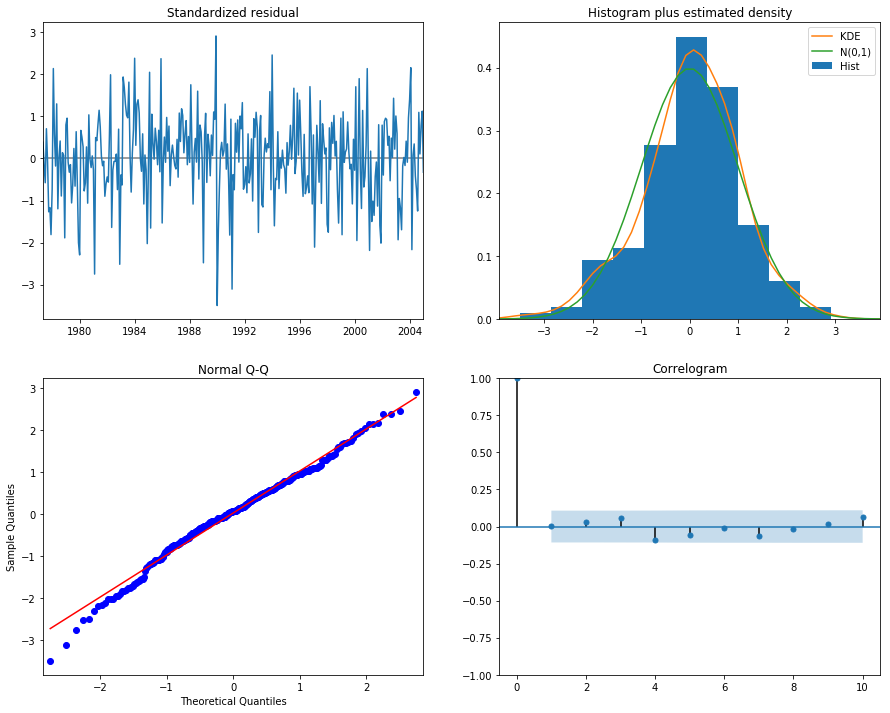

In [17]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Fitted values with dynamic=false

In [18]:
pred = results.get_prediction(start=pd.to_datetime('1973-01-01'), dynamic=False)
pred_ci = pred.conf_int()

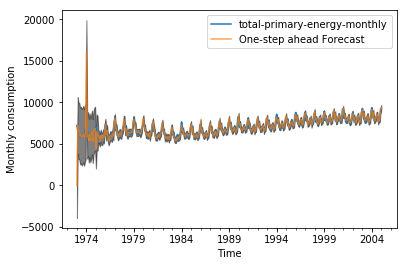

In [19]:
ax = train['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.5)

ax.set_xlabel('Time')
ax.set_ylabel('Monthly consumption')
plt.legend()

plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = train.iloc[:,0]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 409639.19


## Fitted values with dynamic=True

In [21]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1973-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

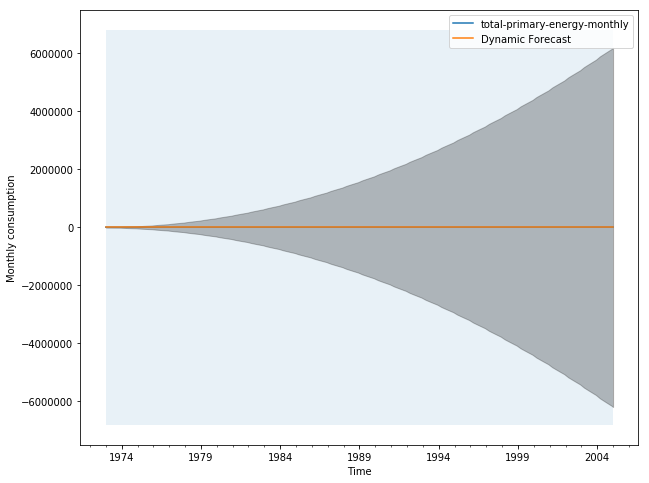

In [22]:
ax = train['1973':].plot(label='observed', figsize=(10, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1973-01-01'), train.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('Monthly consumption')

plt.legend()
plt.show()

In [23]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = train.iloc[:,0]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 50513860.57


Dynamics=False is better (smaller MSE)

## Compare with Test set

In [24]:
# Get forecast 
pred_uc = results.get_forecast(steps=163)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

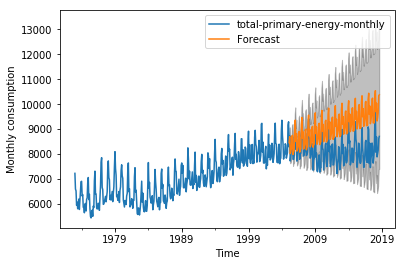

In [26]:
ax = df1.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time')
ax.set_ylabel('Monthly consumption')

plt.legend()
plt.show()